# Naive Bayes Classification

k-NN is a non-parametric machine learning method. Its used for regression and classification. 
* in classification the output is a class memebership. An object is classified by vote of it neighbors
* in regression the output is the propery value for the object. This value is teh average of the values of knearest neighbors. 

k-NN is a type of lazy learning, where the function is approximated locally. In this excercise I will show regression and classification. 

In [2]:
#import libraries
#NOTE: for different clustering algoriths I will append libraries before startign the cifferent clustering process
import numpy as np #mathematical operations
import matplotlib.pyplot as plt # plotting library
import warnings # ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib.colors import ListedColormap
import seaborn as sns

from pandas import read_csv #read the file with pandas
file = 'Avocado.csv'

In [3]:
#read the file and present first 3 rows
data_raw = read_csv(file)
data_raw.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [4]:
#select desired data and its values and transform in matrix = NxM, N being 2 with data x and y and M is the len(x_col.values).
y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[[x_col]].values
c_map = 'Small Bags'

Text(0.5, 1.0, 'Random dependacy')

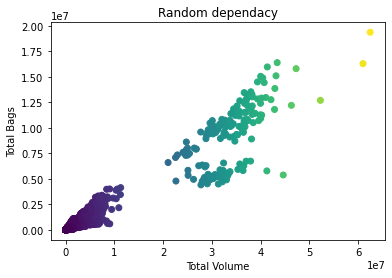

In [5]:
#plot data, so we get the general view of it. 
plt.scatter(x,y, c = x , cmap='viridis')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Random dependacy')

(array([100.,  27.,  28.,  22.,  15.,  13.,  19.,  11.,   9.,   6.]),
 array([  3047.17 ,  27662.171,  52277.172,  76892.173, 101507.174,
        126122.175, 150737.176, 175352.177, 199967.178, 224582.179,
        249197.18 ]),
 <BarContainer object of 10 artists>)

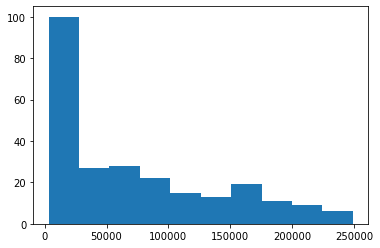

In [30]:
plt.hist(data_raw[y_col][0:250])

## GaussianNB

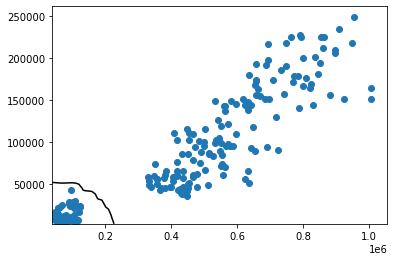

In [66]:
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()


y_col = 'Total Bags'; y = data_raw[y_col].values
x_col = 'Total Volume'; x = data_raw[[x_col]].values   
#data_new = data_raw[data_raw[y_col] != 0]
data_s = data_raw[[x_col, y_col]].values[0:250]
#250 data. We have too many regions and if we include every region its a mess. 
region = data_raw['region'][0:250]
h = 10000 
#set numbers for different regions for a better fit. 
target = lab_enc.fit_transform(region)
x_min, x_max = (data_s[:, 0].min() - 1), (data_s[:, 0].max() + 1)
y_min, y_max = (data_s[:, 1].min() - 1), (data_s[:, 1].max() + 1)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#get unique value from targets
c = np.unique(target)

#create gaussiaNB function
gNB = GaussianNB()
gNB.fit(data_s,target)
Z = gNB.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:,0].reshape(xx.shape)
plt.figure()
plt.scatter(data_s[:,0], data_s[:,1])
plt.contour(xx, yy, Z,levels = [0.1], colors='k')